# Potential Probability of the sales enquiries

Problem Statement:-
    
An online education institute sells courses to industry professionals. 

The company markets its courses on several websites and search engines like Google. 
Once these people land on the website, they might browse the courses or fill up a 
form providing their contact information and other details.
Once these forms are acquired, sales marketing  team start making calls, 
writing emails, etc. Through this process, some of the leads get converted while most do not. 
its lead conversion rate is very poor say 30 percent. 

If they successfully identify this set of enquiries, the sales conversion rate should go up as 
the sales team will now be focusing more on communicating with the potential clients rather 
than making calls to everyone. 

Goal :- find the potential Probability of the sales enquiries.
assign a score between 0 and 100 to target potential leads. 

A higher score would mean that the lead is hot, i.e. is most likely to convert 
whereas a lower score would mean that the lead is cold and will mostly not get converted.

Important Variables	Description
Prospect ID	A unique ID with which the customer is identified.
Lead Origin	The origin identifier with which the customer was identified to be a lead. Includes API, Landing Page Submission, etc.
Lead Source	The source of the lead. Includes Google, Organic Search, Olark Chat, etc.
Converted	The target variable. Indicates whether a lead has been successfully converted or not.
Time Spent on Website	The total time spent by the customer on the website.
Last Activity	Last activity performed by the customer. Includes Email Opened, Olark Chat Conversation, etc.
Specialization	The industry domain in which the customer worked before. Includes the level ‘Select Specialization’, meaning the customer had not selected this option while filling out the form.
What is your current occupation	Indicates whether the customer is a student, unemployed or employed.
City	The city of the customer.

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# visulaisation
from matplotlib.pyplot import xticks
%matplotlib inline

# Data display coustomization
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [2]:
df = pd.DataFrame(pd.read_csv('Targeting_right_customer.csv'))
df.head(5) 

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
data = df.copy()

In [4]:
data.isnull().sum().sort_values(ascending=False)

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

In [5]:
data.shape

(9240, 37)

In [6]:
# Dropping unnnecessary columns
data.drop(['Asymmetrique Activity Index','Asymmetrique Profile Score','Asymmetrique Activity Score','Asymmetrique Profile Index'],inplace=True,axis=1)

In [7]:
data.shape

(9240, 33)

In [8]:
data.isnull().sum().sort_values(ascending=False)

Lead Quality                                     4767
Tags                                             3353
What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
Update me on Supply Chain Content                   0
Prospect ID                                         0
Digital Advertisement                               0
Get updates on DM Content                           0
I agree to pay the amount th

In [9]:
# Unque Variables in every column
for i in data.select_dtypes("O").columns:
    print(i)
    print(data[i].unique())

Prospect ID
['7927b2df-8bba-4d29-b9a2-b6e0beafe620'
 '2a272436-5132-4136-86fa-dcc88c88f482'
 '8cc8c611-a219-4f35-ad23-fdfd2656bd8a' ...
 'aac550fe-a586-452d-8d3c-f1b62c94e02c'
 '5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9'
 '571b5c8e-a5b2-4d57-8574-f2ffb06fdeff']
Lead Origin
['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import'
 'Quick Add Form']
Lead Source
['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Welingak Website' 'Reference' 'google' 'Facebook' nan 'blog'
 'Pay per Click Ads' 'bing' 'Social Media' 'WeLearn' 'Click2call'
 'Live Chat' 'welearnblog_Home' 'youtubechannel' 'testone' 'Press_Release'
 'NC_EDM']
Do Not Email
['No' 'Yes']
Do Not Call
['No' 'Yes']
Last Activity
['Page Visited on Website' 'Email Opened' 'Unreachable'
 'Converted to Lead' 'Olark Chat Conversation' 'Email Bounced'
 'Email Link Clicked' 'Form Submitted on Website' 'Unsubscribed'
 'Had a Phone Conversation' 'View in browser link Clicked' nan
 'Approached upfront' 'SMS Sent' 'Vi

In [10]:
data.drop(['Prospect ID','Lead Number'],inplace=True,axis=1)

In [11]:
data = data.replace('Select',np.nan)

In [12]:
# Basic EDA
data['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

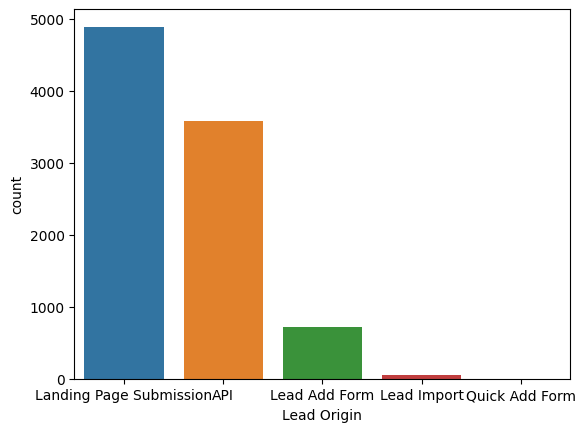

In [13]:
# lets make a bar plot
Lead_data=data["Lead Origin"].value_counts().reset_index()
Lead_data.columns=["Lead Origin","count"]

sns.barplot(x="Lead Origin",y="count",data=Lead_data)
plt.show()

In [14]:
data['Lead Quality'].value_counts()

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

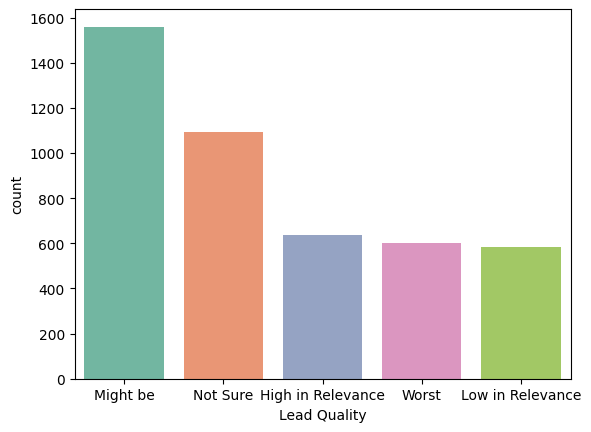

In [15]:
Lead_data=data["Lead Quality"].value_counts().reset_index()
Lead_data.columns=["Lead Quality","count"]

sns.barplot(x="Lead Quality",y="count",data=Lead_data,palette='Set2')
plt.show()

In [16]:
# Filling Null values
data['Lead Quality'].fillna(value='Not Sure',inplace=True)

In [17]:
data.head(2)

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,NaN,No,No,Email Opened


In [18]:
data['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [19]:
data.drop('Country',inplace=True,axis=1)

In [20]:
data.City.value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

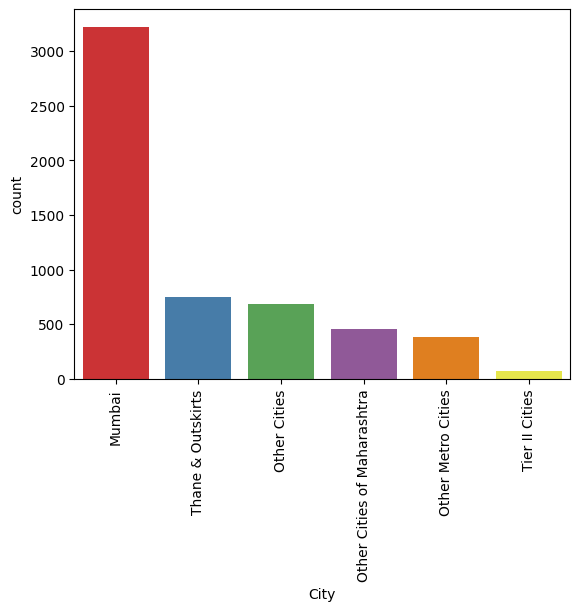

In [21]:
City_data=data["City"].value_counts().reset_index()
City_data.columns=["City","count"]
xticks(rotation=90)
sns.barplot(x="City",y="count",data=City_data,palette='Set1')
plt.show()

In [22]:
data.City.fillna(value='Mumbai',inplace=True)

In [23]:
data['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

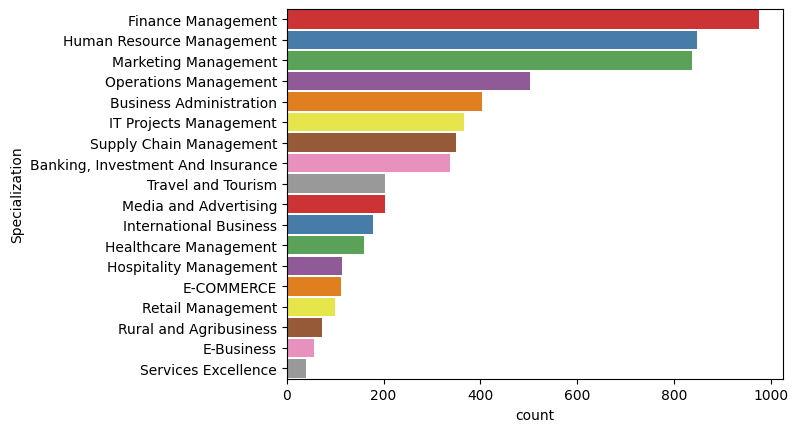

In [24]:
Specializaion_data=data["Specialization"].value_counts().reset_index()
Specializaion_data.columns=["Specialization","count"]
sns.barplot(y="Specialization",x="count",data=Specializaion_data,palette='Set1',width=.9)
plt.show()

In [25]:
data['Specialization'].replace(np.nan,'Others',inplace=True)

In [26]:
data.drop(['How did you hear about X Education','Lead Profile'],inplace=True,axis=1)

In [27]:
data.Tags.unique()

array(['Interested in other courses', 'Ringing',
       'Will revert after reading the email', nan, 'Lost to EINS',
       'In confusion whether part time or DLP', 'Busy', 'switched off',
       'in touch with EINS', 'Already a student',
       'Diploma holder (Not Eligible)', 'Graduation in progress',
       'Closed by Horizzon', 'number not provided', 'opp hangup',
       'Not doing further education', 'invalid number',
       'wrong number given', 'Interested  in full time MBA',
       'Still Thinking', 'Lost to Others',
       'Shall take in the next coming month', 'Lateral student',
       'Interested in Next batch', 'Recognition issue (DEC approval)',
       'Want to take admission but has financial problems',
       'University not recognized'], dtype=object)

In [28]:
data.drop('Tags',inplace=True,axis=1)

In [29]:
data['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

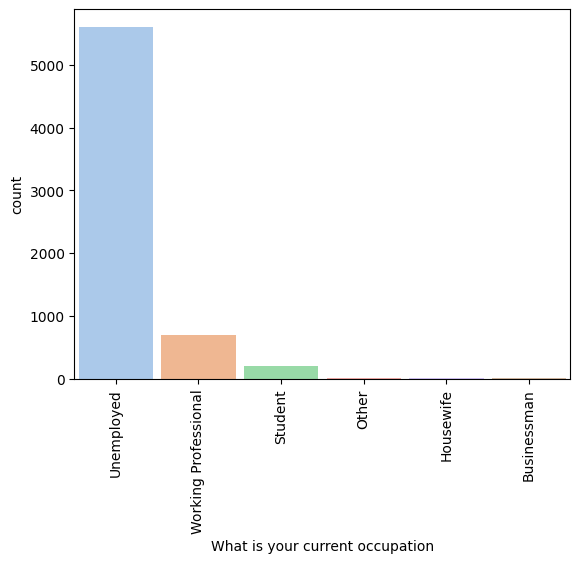

In [30]:
Occupation_data=data["What is your current occupation"].value_counts().reset_index()
Occupation_data.columns=["What is your current occupation","count"]
sns.barplot(x="What is your current occupation",y="count",data=Occupation_data,palette='pastel',width=.9)
xticks(rotation=90)
plt.show()

In [31]:
data['What is your current occupation'].fillna(value='Other',inplace=True)

In [32]:
data['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [33]:
data['What matters most to you in choosing a course'].fillna(value='Other',inplace=True)

In [34]:
data = data.dropna(how='any')

In [35]:
data.isnull().sum()

Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement                            0
Through Recommendations                          0
Receive More Updates About Our 

In [36]:
data.shape

(9074, 27)

<Axes: xlabel='Total Time Spent on Website', ylabel='Page Views Per Visit'>

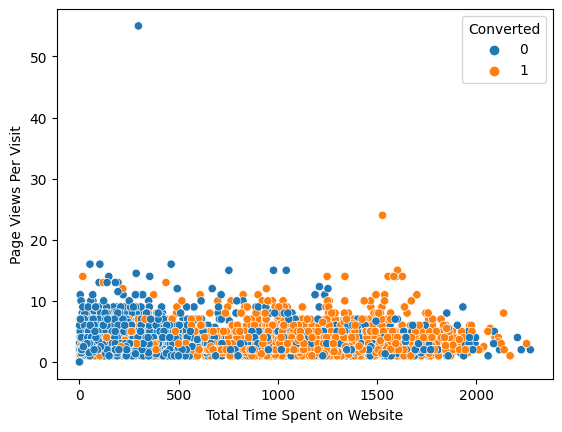

In [37]:
sns.scatterplot(x= 'Total Time Spent on Website',y='Page Views Per Visit',data=data,hue='Converted')

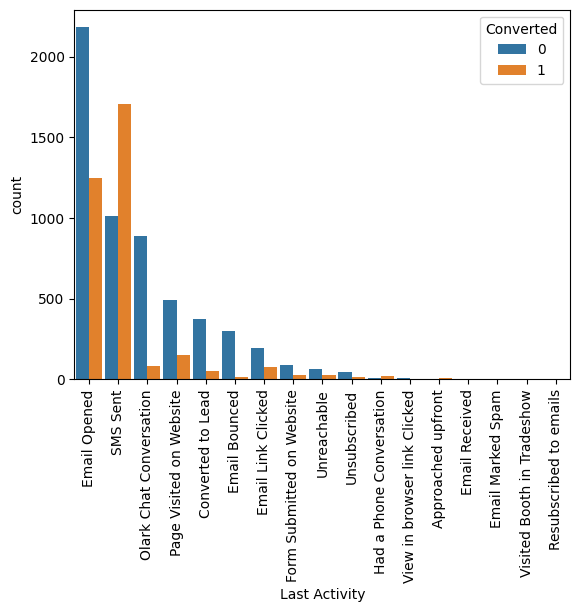

In [38]:
# Get the count of each category in 'Last Activity' column
activity_counts = data['Last Activity'].value_counts()

# Sort the categories based on their counts in descending order
activity_order = activity_counts.index.tolist()

# Plot the countplot with ordered bars
sns.countplot(data=data, x='Last Activity', hue='Converted', order=activity_order, width=.9)
plt.xticks(rotation=90)
plt.show()

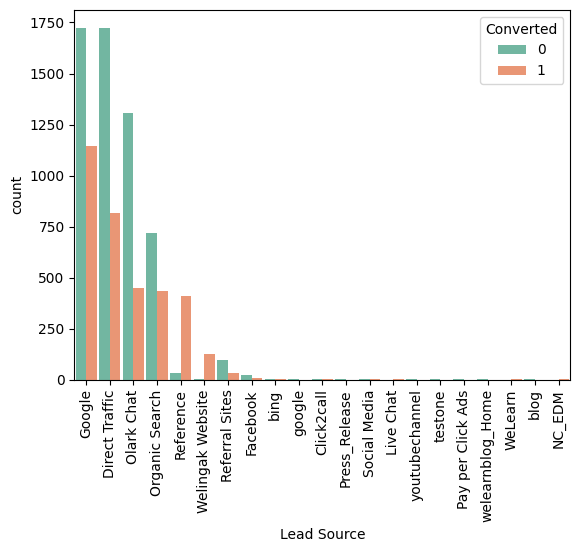

In [39]:
# Get the count of each category in 'Lead Source' column
Lead_source_counts = data['Lead Source'].value_counts()

# Sort the categories based on their counts in descending order
Lead_source = Lead_source_counts.index.tolist()

# Plot the countplot with ordered bars
sns.countplot(data=data, x='Lead Source', hue='Converted', order=Lead_source, width=.9,palette='Set2')
plt.xticks(rotation=90)
plt.show()

In [40]:
data.head(2)

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Low in Relevance,No,No,Mumbai,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Not Sure,No,No,Mumbai,No,No,Email Opened


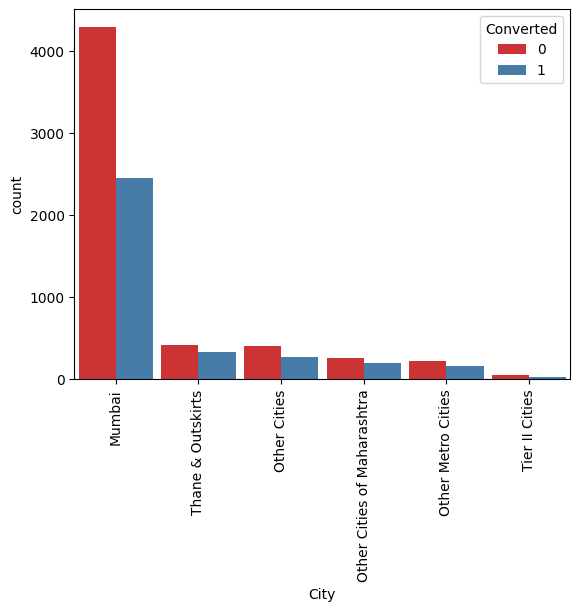

In [41]:
# Get the count of each category in 'Lead Source' column
city_counts = data['City'].value_counts()

# Sort the categories based on their counts in descending order
City_sorted = city_counts.index.tolist()

# Plot the countplot with ordered bars
sns.countplot(data=data, x='City', hue='Converted', order=City_sorted, width=.9,palette='Set1')
plt.xticks(rotation=90)
plt.show()

In [42]:
for i in data.select_dtypes("O").columns:
    print('#################### \n')
    print(i)
    print(data[i].value_counts())

#################### 

Lead Origin
Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64
#################### 

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64
#################### 

Do Not Email
No     8358
Yes     716
Name: Do Not Email, dtype: int64
#################### 

Do Not Call
No     9072
Yes       2
Name: Do Not Call, dtype: int64
########

In [43]:
data_2 = data.drop(['Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'],axis=1)

In [44]:
data_2.shape

(9074, 15)

In [45]:
# map to convert two category column 
data_2['Do Not Email'] = data_2['Do Not Email'].map({"Yes":1,"No":0})

In [46]:
data_2['A free copy of Mastering The Interview'] = data_2['A free copy of Mastering The Interview'].map({"Yes":1,"No":0})

In [47]:
# Correlation Matrix
corr_matrix = data_2.corr(method='spearman')

<Axes: >

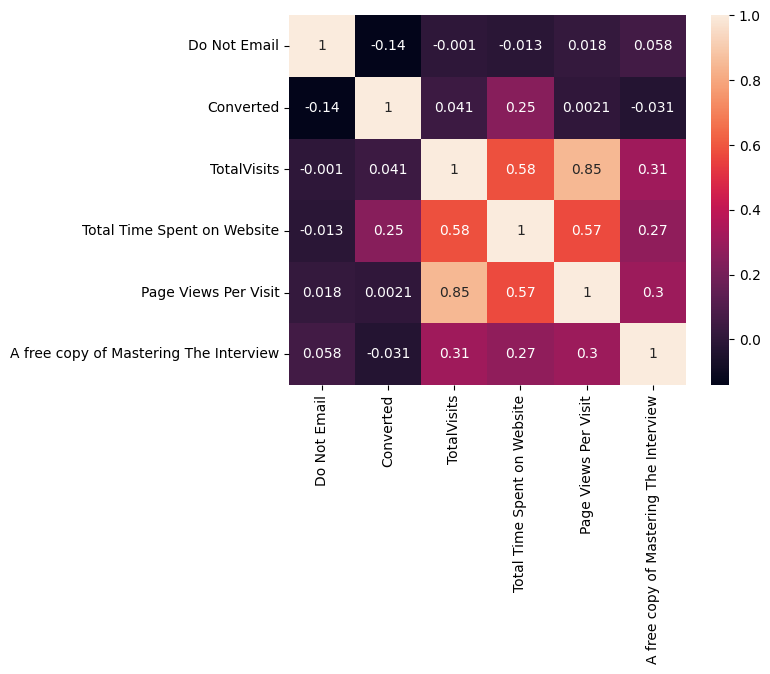

In [48]:
sns.heatmap(corr_matrix,annot=True)

In [49]:
data_2.head(2)

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Lead Quality,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Better Career Prospects,Low in Relevance,Mumbai,0,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,Better Career Prospects,Not Sure,Mumbai,0,Email Opened


In [50]:
data_2 = pd.get_dummies(columns=['Lead Origin','Lead Source','Last Activity','Specialization','What is your current occupation','What is your current occupation','What matters most to you in choosing a course','Lead Quality','City','Last Notable Activity'],data=data_2,drop_first=True,dtype='float')

In [51]:
data_2.shape

(9074, 99)

In [52]:
data_2.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,5.0,674,2.5,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1,2.0,1

In [53]:
data_2 = data_2.drop(index=0)

In [54]:
data_2.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1,0,0,5.0,674,2.5,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1,2.0,1532,2.0,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,1.

In [55]:
X = data_2.drop(['Converted'],axis=1)
Y = data_2['Converted']

In [56]:
# Preprocessing
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [57]:
scaler = MinMaxScaler()

In [58]:
X[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [59]:
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1,0,0.019920,0.296655,0.045455,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.007968,0.674296,0.036364,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

# OLS Approach 

In [60]:
import statsmodels.api as sm

In [61]:
X1 = sm.add_constant(X)

In [62]:
X1.head()

,const,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1,1.0,0,0.019920,0.296655,0.045455,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0,0.007968,0.674296,0.036364,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0

In [63]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X1,Y,train_size=0.8,random_state=100)

In [64]:
#Logistic Regression Model
log_model = sm.GLM(y_train,X_train,family=sm.families.Binomial())
log_model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7258
Model:                            GLM   Df Residuals:                     7167
Model Family:                Binomial   Df Model:                           90
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Thu, 08 Jun 2023   Deviance:                   1.2075e+05
Time:                        13:29:35   Pearson chi2:                 5.90e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                    9.181e+15   6.85e+07   1.34e+08      0.000    9.18e+15    9.18e+15
Do Not Email                                                            -2.531e+14   4.22e+06     -6e+07      0.000   -2.53e+14   -2.53e+14
TotalVisits                                                              6.253e+15   7.26e+07   8.62e+07      0.000    6.25e+15    6.25e+15
Total Time Spent on Website                                              9.946e+14   3.92e+06   2.54e+08      0.000    9.95e+14    9.95e+14
Page Views Per Visit                                                    -2.537e+15   3.11e+07  -8.16e+07      0.000   -2.54e+15   -2.54e+15
A free copy of Mastering The Interview                                   8.371e+13   2.53e+06   3.31e+07      0.000    8.37e+13    8.37e+13
Lead Origin_Landing Page Submission                                     -3.027e+14   3.22e+06   -9.4e+07      0.000   -3.03e+14   -3.03e+14
Lead Origin_Lead Add Form                                               -1.092e+14   3.89e+07  -2.81e+06      0.000   -1.09e+14   -1.09e+14
Lead Origin_Lead Import                                                  3.623e+15   6.88e+07   5.26e+07      0.000    3.62e+15    3.62e+15
Lead Source_Direct Traffic                                              -2.013e+15   5.15e+07  -3.91e+07      0.000   -2.01e+15   -2.01e+15
Lead Source_Facebook                                                     -7.26e+15   8.49e+07  -8.55e+07      0.000   -7.26e+15   -7.26e+15
Lead Source_Google                                                      -1.848e+15   5.14e+07  -3.59e+07      0.000   -1.85e+15   -1.85e+15
Lead Source_Live Chat                                                    3.699e+15   5.83e+07   6.35e+07      0.000     3.7e+15     3.7e+15
Lead Source_NC_EDM                                                        7.98e+15   8.46e+07   9.44e+07      0.000    7.98e+15    7.98e+15
Lead Source_Olark Chat                                                   -2.33e+15   5.14e+07  -4.53e+07      0.000   -2.33e+15   -2.33e+15
Lead Source_Organic Search                                              -1.925e+15   5.15e+07  -3.74e+07      0.000   -1.92e+15   -1.92e+15
Lead Source_Pay per Click Ads                                           -2.604e+15   8.47e+07  -3.07e+07      0.000    -2.6e+15    -2.6e+15
Lead Source_Press_Release                                               -2.983e+15   7.05e+07  -4.23e+07      0.000   -2.98e+15   -2.98e+15
Lead Source_Reference                                                   -1.639e+15   3.39e+07  -4.84e+07      0.000   -1.64e+15   -1.64e+15
Lea

# Recursive Feature Elimination

In [65]:
from sklearn.feature_selection import RFE

In [66]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [67]:
rfe = RFE(logreg,n_features_to_select=15)
rfe = rfe.fit(X_train,y_train)

In [68]:
rfe.support_

array([False,  True, False,  True,  True, False, False,  True, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False,  True,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False, False])

In [69]:
# Selected Columns
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Working Professional',
       'Lead Quality_Might be', 'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [70]:
# not selected Columns
X_train.columns[~rfe.support_]

Index(['const', 'TotalVisits', 'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened',
       'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 

In [71]:
X_train_sm = sm.add_constant(X_train[col])
log_model_2 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
result = log_model_2.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7258
Model:                            GLM   Df Residuals:                     7242
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2481.1
Date:                Thu, 08 Jun 2023   Deviance:                       4962.2
Time:                        13:29:57   Pearson chi2:                 7.41e+03
No. Iterations:                    12   Pseudo R-squ. (CS):             0.4737
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3450      0.145      2.382      0.017       0.061       0.629
Do Not Email                                            -1.2266      0.174     -7.032      0.000      -1.568      -0.885
Total Time Spent on Website                              4.5375      0.174     26.040      0.000       4.196       4.879
Page Views Per Visit                                    -3.6442      1.242     -2.934      0.003      -6.079      -1.210
Lead Origin_Lead Add Form                                2.4541      0.243     10.117      0.000       1.979       2.929
Lead Source_Olark Chat                                   1.3087      0.125     10.447      0.000       1.063       1.554
Lead Source_Welingak Website                             3.7485      0.759      4.940      0.000       2.261       5.236
Last Activity_Converted to Lead                         -1.1402      0.228     -5.002      0.000      -1.587      -0.693
Last Activity_Had a Phone Conversation                   2.3132      1.083      2.136      0.033       0.191       4.436
Last Activity_Olark Chat Conversation                   -1.3753      0.168     -8.172      0.000      -1.705      -1.045
What is your current occupation_Working Professional     0.8017      0.099      8.070      0.000       0.607       0.996
What is your current occupation_Working Professional     0.8017      0.099      8.070      0.000       0.607       0.996
Lead Quality_Might be                                   -1.3714      0.142     -9.643      0.000      -1.650      -1.093
Lead Quality_Not Sure                                   -3.1476      0.126    -25.053      0.000      -3.394      -2.901
Lead Quality_Worst                                      -5.4313      0.376    -14.454      0.000      -6.168      -4.695
Last Notable Activity_SMS Sent                           1.5578      0.083     18.815      0.000       1.396       1.720
Last Notable Activity_Unreachable                        1.2681      0.635      1.996      0.046       0.023       2.513
========================================================================================================================
"""

# Get the Probabibility Score

In [72]:
y_train_predict = result.predict(X_train_sm)
y_train_predict

3637    0.093436
3237    0.874739
5526    0.515975
4041    0.003757
858     0.081947
          ...   
368     0.053699
83      0.053699
8200    0.248133
7078    0.183336
5755    0.454278
Length: 7258, dtype: float64

In [73]:
# Another approach
logreg.fit(X_train_sm,y_train)

LogisticRegression()

In [74]:
proabability_score = logreg.predict_proba(X_train_sm)
proabability_score

array([[0.90145996, 0.09854004],
       [0.12663981, 0.87336019],
       [0.49439916, 0.50560084],
       ...,
       [0.76775833, 0.23224167],
       [0.81715145, 0.18284855],
       [0.55704102, 0.44295898]])

In [75]:
pos_probability_score = logreg.predict_proba(X_train_sm)[:,1]
pos_probability_score

array([0.09854004, 0.87336019, 0.50560084, ..., 0.23224167, 0.18284855,
       0.44295898])

In [76]:
# Continue with OLS
y_train_predict = y_train_predict.values.reshape(-1)
y_train_predict

array([0.09343581, 0.87473862, 0.51597499, ..., 0.24813268, 0.18333576,
       0.45427796])

In [77]:
# Create a dataframe as per the form we have recieved
y_train_predict_final = pd.DataFrame({'Converted':y_train.values,"Converted_prob":y_train_predict})
y_train_predict_final["Customer_ID"]=y_train.index
y_train_predict_final.head(10)

,Converted,Converted_prob,Customer_ID
0,0,0.093436,3637
1,1,0.874739,3237
2,1,0.515975,5526
3,0,0.003757,4041
4,0,0.081947,858
5,1,0.389222,4165
6,0,0.345760,8918
7,0,0.086885,4866
8,0,0.069736,8688
9,1,0.651710,2004


In [78]:
# ROC Curve,threshold value
from sklearn.metrics import roc_curve,precision_recall_curve,f1_score,auc


In [79]:
fpr,tpr,thresholds_roc = roc_curve(y_train_predict_final.Converted,y_train_predict_final.Converted_prob)

In [80]:
precision,recall,threshold_pr = precision_recall_curve(y_train_predict_final.Converted,y_train_predict_final.Converted_prob)

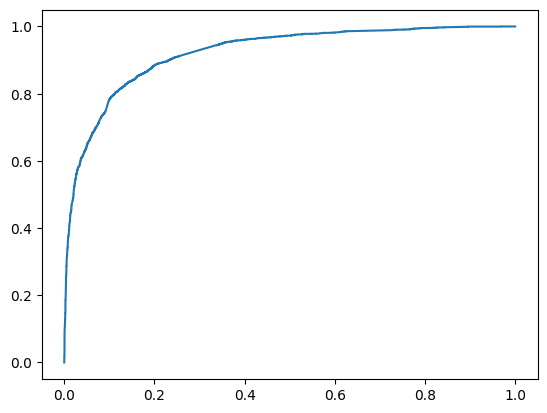

In [81]:
# Plot the roc_curve
plt.plot(fpr,tpr,label='Roc Curve')

In [82]:
# finding th threshold value
f1_scores=2*(precision*recall)/(precision+recall)
optimal_idx=np.argmax(f1_scores)
optimal_threshold=threshold_pr[optimal_idx]

In [83]:
optimal_threshold

0.42623323188851

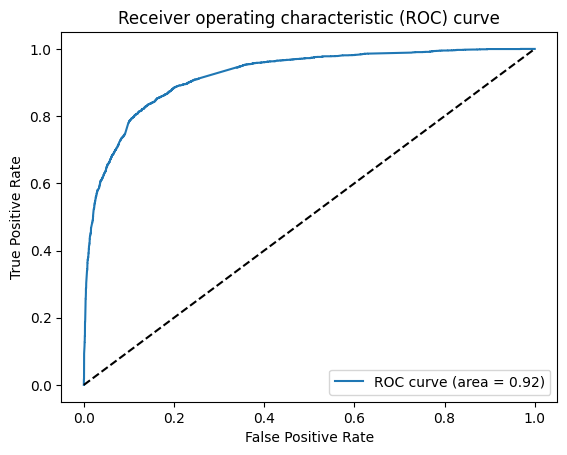

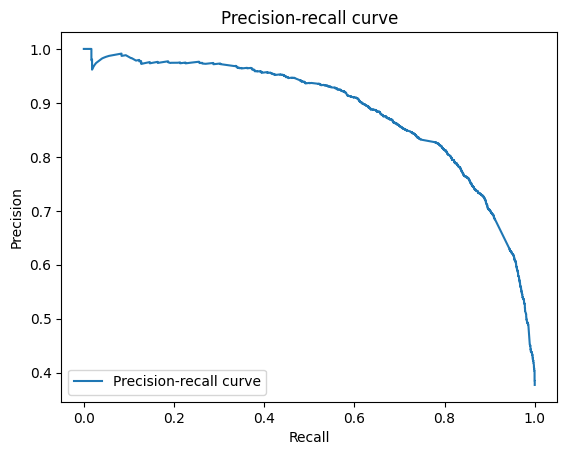

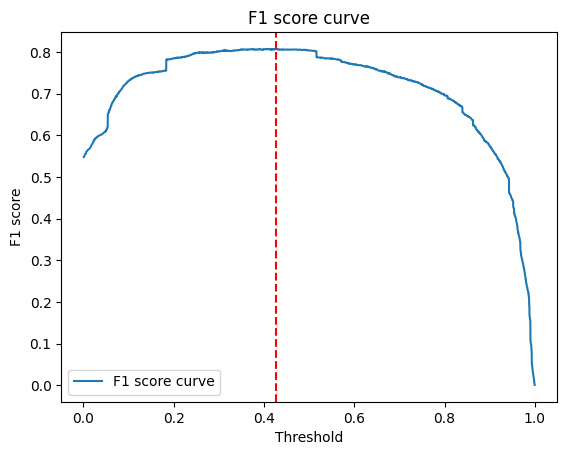

In [84]:
from sklearn.metrics import roc_curve, precision_recall_curve, f1_score, auc
import matplotlib.pyplot as plt

# assuming y_true and y_pred are the true and predicted binary labels
fpr, tpr, thresholds_roc = roc_curve( y_train_predict_final.Converted, y_train_predict_final.Converted_prob)

precision, recall, thresholds_pr = precision_recall_curve( y_train_predict_final.Converted, y_train_predict_final.Converted_prob)

# calculate F1 score for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall)
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds_pr[optimal_idx]

# plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
#plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

# plot precision-recall curve
plt.plot(recall, precision, label='Precision-recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-recall curve')
plt.legend(loc="lower left")
plt.show()

# plot F1 score curve
plt.plot(thresholds_pr, f1_scores[:-1], label='F1 score curve')
plt.axvline(x=optimal_threshold, color='r', linestyle='--')
plt.xlabel('Threshold')
plt.ylabel('F1 score')
plt.title('F1 score curve')
plt.legend(loc="lower left")
plt.show()

In [85]:
y_train_predict_final["Final_prediction"]=y_train_predict_final.Converted_prob.map(lambda x:1 if x>0.4 else 0)

In [87]:
y_train_predict_final.head()

,Converted,Converted_prob,Customer_ID,Final_prediction
0,0,0.093436,3637,0
1,1,0.874739,3237,1
2,1,0.515975,5526,1
3,0,0.003757,4041,0
4,0,0.081947,858,0


In [88]:
y_train_predict_final["enquiry_score"]=y_train_predict_final.Converted_prob.map(lambda x: round(x*100))

In [90]:
y_train_predict_final.head()

,Converted,Converted_prob,Customer_ID,Final_prediction,enquiry_score
0,0,0.093436,3637,0,9
1,1,0.874739,3237,1,87
2,1,0.515975,5526,1,52
3,0,0.003757,4041,0,0
4,0,0.081947,858,0,8


In [91]:
def decide_enquiry_quality(probability,hot_threshold=0.70,cold_threshold=0.30):
    if probability>= hot_threshold:
        return "Most Imp enquiry"
    elif probability<cold_threshold:
        return "COLD CASE"
    else:
        return "POTENTAIL CLIENT"

In [92]:
y_train_predict_final["Enquiry quality"]=y_train_predict_final["Converted_prob"].apply(decide_enquiry_quality)

In [94]:
y_train_predict_final

,Converted,Converted_prob,Customer_ID,Final_prediction,enquiry_score,Enquiry quality
0,0,0.093436,3637,0,9,COLD CASE
1,1,0.874739,3237,1,87,Most Imp enquiry
2,1,0.515975,5526,1,52,POTENTAIL CLIENT
3,0,0.003757,4041,0,0,COLD CASE
4,0,0.081947,858,0,8,COLD CASE
...,...,...,...,...,...,...
7253,0,0.053699,368,0,5,COLD CASE
7254,0,0.053699,83,0,5,COLD CASE
7255,0,0.248133,8200,0,25,COLD CASE
7256,0,0.183336,7078,0,18,COLD CASE


In [96]:
from sklearn.metrics import classification_report,accuracy_score

In [98]:
print(classification_report(y_train_predict_final.Converted,y_train_predict_final.Final_prediction))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      4519
           1       0.80      0.82      0.81      2739

    accuracy                           0.85      7258
   macro avg       0.84      0.85      0.84      7258
weighted avg       0.85      0.85      0.85      7258

